<a href="https://colab.research.google.com/github/AboliZ/Diabetes-Patients-Analysis/blob/main/Diabetes_Patients_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Diabetes Patients Analysis**





---



---



---



##**About Dataset**

---



---



This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2


##**Features :**

**Pregnancies:** Number of times pregnant.

**Glucose:** Plasma glucose concentration.

**Blood Pressure:** Diastolic blood pressure.

**Skin Thickness:** Triceps skinfold thickness.

**Insulin:** 2-Hour serum insulin.

**BMI (Body Mass Index):** Weight in kg / (height in m)^2.

**Diabetes Pedigree Function:** A function that represents the likelihood of diabetes based on family history.

**Age:** Age in years.

**Outcome:** A binary variable indicating the presence or absence of diabetes (0 for no diabetes, 1 for diabetes).

####**Data Loading**

---



---



In [ ]:
# Import necessary libraries for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing file from a local folder

from google.colab import files
uploaded = files.upload()

Saving Diabetes Patients.csv to Diabetes Patients.csv


In [ ]:
# To read the file

df = pd.read_csv("Diabetes Patients.csv")
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


####**Data Exploration**

---



---



In [ ]:
#To check the rows and columns
df.shape

(768, 9)

In [ ]:
# Display the column names in the DataFrame
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Display information about the DataFrame 'df', non_null count,including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


CHECKING FOR MISSING VALUES

In [ ]:
#To check null values in a tabular form
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Generate summary statistics for the numerical columns in the DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Axes: >

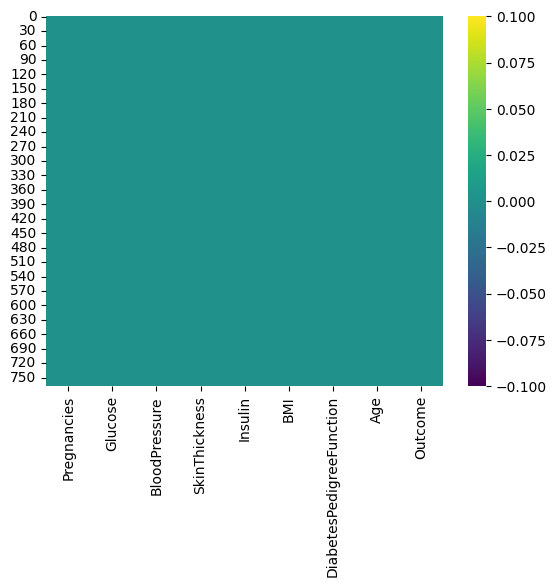

In [ ]:
# Create a heatmap to visualize missing (null) values in the DataFrame
sns.heatmap(df.isnull(),cmap="viridis")

In [ ]:
# Calculate the correlation matrix for the DataFrame columns
# To understand the relationships between variables

correlation = df.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

####**CO RELATION MATRIX**

1.**Glucose and Age have moderate positive correlations with Outcome**,
indicating that higher glucose levels and older age are associated with a higher likelihood of diabetes.

2.**BMI and Insulin also show some positive correlation with Outcome**,though weaker than Glucose and Age.

3.**Most other variables have relatively low correlations with Outcome.**



As shown in the plot above, there are no null values present.

<Axes: >

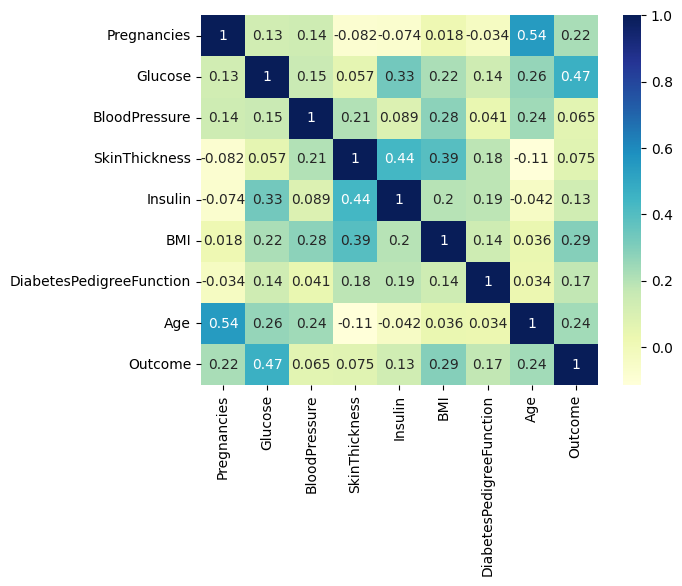

In [ ]:
#Check the heatmap correlation of the features
sns.heatmap(df.corr(),annot = True,cmap='YlGnBu')

###**Data Visualization**

###**Distribution of data using appropriate plots**

---



---



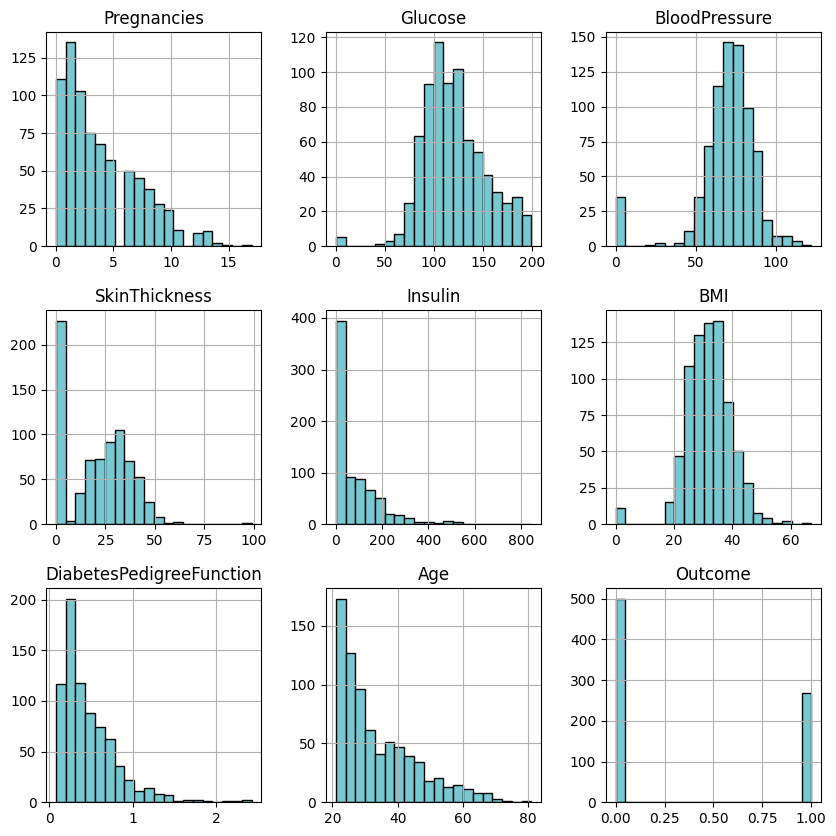

In [ ]:
# Create histograms for each column in the DataFrame with specified parameters

df.hist(bins = 20,figsize=(10,10),color="#77C8D1",edgecolor='k',alpha=1,lw=1)
plt.show()


 The **Outcome histogram is binary**, showing the distribution of the target variable. It indicates that the dataset has a reasonably **balanced distribution between individuals with and without diabetes (0 and 1).**

 0 represents that the person is not diabetic and 1 shows that
the person is diabetic.

In [ ]:
# Calculate skewness for the dataframe

def skewness(data):
    """this function calculates the skewness value
    of each column
    parameter:data=dataframe
    return: Series with skewness values for each column"""
    return data.skew()
skewness(df)

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

By calling defined function,I calculate skewness of each column of dataframe.



If **skewness** is between **-0.5 to 0.5 then data are fairly symmetrical.**

If **skewness** is between **-1 to -0.5 & 0.5 to 1 then data are moderately skewed.**

If **skewness** is between **lt -1 or gt 1 then data are highly skewed.**



###**To find the outliers present in a given dataset using box plot method**

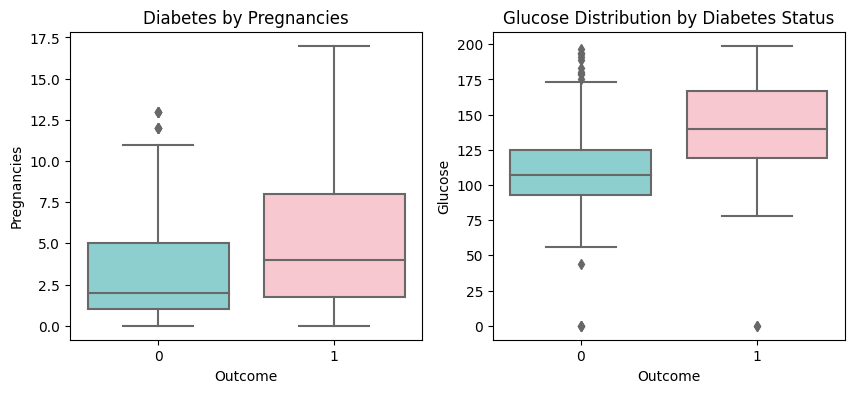

In [ ]:
C_palette = {0: '#81DAD9', 1: 'pink'}

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first boxplot on the left subplot
sns.boxplot(x="Outcome", y="Pregnancies", data=df, palette=C_palette, ax=axes[0])
axes[0].set_title("Diabetes by Pregnancies")

# Plot the second boxplot on the right subplot
sns.boxplot(x="Outcome", y="Glucose", data=df, palette=C_palette, ax=axes[1])
axes[1].set_title("Glucose Distribution by Diabetes Status")

# Display the plots
plt.show()

This box plot illustrates the distribution of the number of pregnancies for diabetic (1) and non-diabetic (0) patients.

 the non-diabetic group (0) exhibits outliers

 **Diabetic patients tend to have higher glucose levels compared to non-diabetic patients**, there are some exceptional cases with elevated glucose levels.

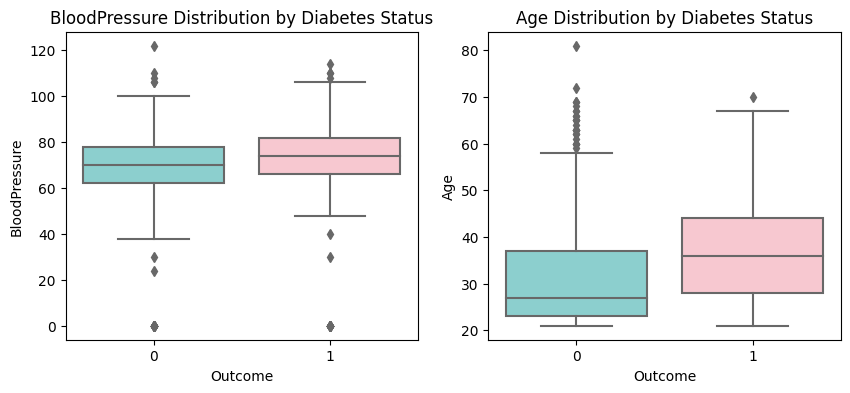

In [ ]:
C_palette = {0: '#81DAD9', 1: 'pink'}

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first boxplot for "BloodPressure" on the left subplot
sns.boxplot(x="Outcome", y="BloodPressure", data=df, palette=C_palette, ax=axes[0])
axes[0].set_title("BloodPressure Distribution by Diabetes Status")

# Plot the second boxplot for "Age" on the right subplot
sns.boxplot(x="Outcome", y="Age", data=df, palette=C_palette, ax=axes[1])
axes[1].set_title("Age Distribution by Diabetes Status")

# Display the plots
plt.show()


**Diabetic individuals (pink) tend to have slightly higher blood pressure** compared to non-diabetic individuals (light blue).

Diabetic individuals (pink) are generally younger, while non-diabetic individuals (light blue) span a wider age range.

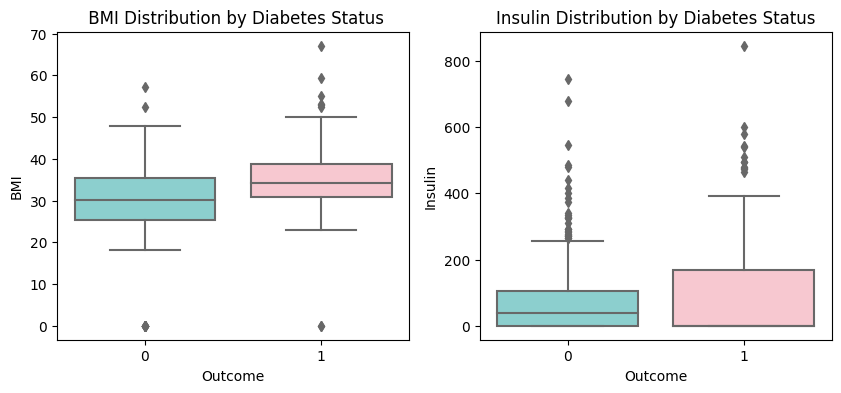

In [ ]:
C_palette = {0: '#81DAD9', 1: 'pink'}

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the boxplot for "BMI" on the left subplot
sns.boxplot(x="Outcome", y="BMI", data=df, palette=C_palette, ax=axes[0])
axes[0].set_title(" BMI Distribution by Diabetes Status")

# Plot the boxplot for "Insulin" on the right subplot
sns.boxplot(x="Outcome", y="Insulin", data=df, palette=C_palette, ax=axes[1])
axes[1].set_title("Insulin Distribution by Diabetes Status")

# Display the plots
plt.show()


There's a noticeable difference in BMI distribution between the two groups, with **diabetic individuals having higher BMIs on average.**

**Diabetic individuals show more variation in insulin levels** (pink) than non-diabetics (light blue).

**Glucose:** The Glucose column does not show significant outliers, and it has a relatively symmetrical distribution.

**Outcome:** The "Outcome" column is a binary variable and is not visualized in a box plot.

And rest columns shows  a skewed distribution with some outliers.

**Distribution Of Outcome**

---



---



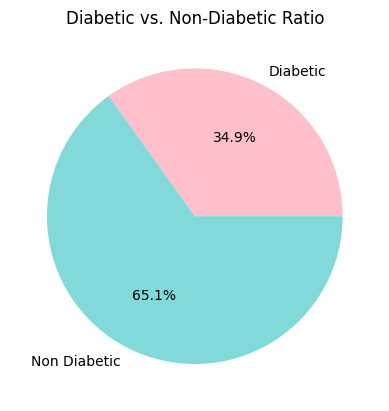

In [ ]:
# Calculate the number of diabetic individuals (Outcome=1) and non-diabetic individuals (Outcome=0)
diabetic = len(df[df["Outcome"]==1])
non_diabetic = len(df[df["Outcome"]==0])

# Create a counts of diabetic and non-diabetic individuals
count = (diabetic,non_diabetic)

# Define labels for the pie chart, representing the categories
labels = ("Diabetic","Non Diabetic")

plt.pie(count,labels=labels,autopct='%1.1f%%',colors={'pink','#81DAD9'})

# Set a title for the pie chart
plt.title('Diabetic vs. Non-Diabetic Ratio')

plt.show()

####**Importing Libraries for Machine Learning Model**


In [ ]:
# Import necessary libraries and suppress warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Splitting Data into Training and Testing Sets

x = df.drop('Outcome',axis=1)
y = df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
# Creating and Training a Logistic Regression Model
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Making Predictions and Printing the Results
prediction = model.predict(x_test)
print(prediction)

[1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0]


In [ ]:
# Calculating and Printing Model Accuracy
accuracy = accuracy_score(prediction,y_test)
print(accuracy)

0.7337662337662337


###**Conclusion**

---



This data analysis project identified key factors associated with diabetes, including age, BMI, blood pressure, and insulin levels. **A logistic regression model achieved an accuracy of approximately 73.38% in predicting diabetes.** The analysis highlights the need for further exploration and data preprocessing to support effective strategies for diabetes prevention and management.

---



---

